Classification of soybean genotypes in drought and saline stress environment using Decision Tree algorithm

Classify the samples as belonging to the control or stress group (Drought, Saline). Such a model will make it possible to identify whether the plant has suffered any type of stress such as drought or excess salt.


In [13]:
import numpy as np
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import IsolationForest
from sklearn.metrics import accuracy_score, precision_score, recall_score, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.model_selection import GroupKFold
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder
from IPython.display import display, SVG
from graphviz import Source
from sklearn.tree import export_graphviz
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.svm import SVC



In [14]:
'''
Read data and Create dataset
'''
df = pd.read_csv('data_classification.csv')

y = np.array(df['CLASS'])
Cultivar = np.array(df['CULTIVAR'])
del df['CLASS']
del df['CULTIVAR']
X = np.array(df, dtype=np.float32)

In [15]:
df.shape

(552, 7)

In [16]:
df.isnull().sum()

GERM    0
SL      0
RL      0
TL      0
SDM     0
RDM     0
TDM     0
dtype: int64

In [17]:
from sklearn.naive_bayes import GaussianNB

# Define the parameter grid for Naive Bayes (GaussianNB has no hyperparameters to tune)
param_grid = {}

# Initialize GroupKFold
group_kfold = GroupKFold(n_splits=10)

# Initialize counter for folds
K = 1

# Iterate over the folds
for train_index, test_index in group_kfold.split(X, y, Cultivar):
    print('Fold %i' % K)

    # Split data into train and test sets based on the fold indices
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Initialize and fit Naive Bayes classifier
    nb_clf = GaussianNB()
    nb_clf.fit(X_train, y_train)

    # Print model evaluation results
    print("Accuracy:", nb_clf.score(X_test, y_test))

    # Update fold counter
    K += 1


Fold 1
Accuracy: 0.8666666666666667
Fold 2
Accuracy: 0.9166666666666666
Fold 3
Accuracy: 1.0
Fold 4
Accuracy: 0.9166666666666666
Fold 5
Accuracy: 0.8833333333333333
Fold 6
Accuracy: 0.95
Fold 7
Accuracy: 1.0
Fold 8
Accuracy: 0.9166666666666666
Fold 9
Accuracy: 0.9791666666666666
Fold 10
Accuracy: 0.9791666666666666


In [18]:
'''
Random Forest with fixed parameter, over 10-fold, using the measures of accuracy, precision and recall and confusion matrix
'''
K = 1

acc_train = []
acc_test  = []

pr_train = []
pr_test  = []

re_train = []
re_test  = []

mc_train = []
mc_test  = []

train_indices = []
test_indices  = []

group_kfold = GroupKFold(n_splits=10)

for train_index, test_index in group_kfold.split(X, y, Cultivar):
  print('Fold %i' %K)

  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

  train_indices.append(train_index)
  test_indices.append(test_index)

  clf = GaussianNB()
  clf.fit(X_train, y_train)

  y_pred_train = clf.predict(X_train)
  y_pred_test  = clf.predict(X_test)

  r_acc_train = accuracy_score(y_train, y_pred_train)
  r_acc_test  = accuracy_score(y_test, y_pred_test)
  acc_train.append(r_acc_train)
  acc_test.append(r_acc_test )

  r_pr_train = precision_score(y_train, y_pred_train, average='weighted')
  r_pr_test  = precision_score(y_test, y_pred_test, average='weighted')
  pr_train.append(r_pr_train)
  pr_test.append(r_pr_test)

  r_re_train = recall_score(y_train, y_pred_train, average='weighted')
  r_re_test  = recall_score(y_test, y_pred_test, average='weighted')
  re_train.append(r_re_train)
  re_test.append(r_re_test)

  r_mc_train = confusion_matrix(y_train, y_pred_train)
  r_mc_test  = confusion_matrix(y_test, y_pred_test)
  mc_train.append(r_mc_train)
  mc_test.append(r_mc_test)

  print('\t Training: ')
  print('\t Acc: %.4f - Pr: %.4f - Re: %.4f' %(r_acc_train, r_pr_train, r_re_train))
  print('\t Test: ')
  print('\t Acc: %.4f - Pr: %.4f - Re: %.4f' %(r_acc_test, r_pr_test, r_re_test))

  K = K + 1

acc_train = np.array(acc_train)
acc_test  = np.array(acc_test)

pr_train = np.array(pr_train)
pr_test  = np.array(pr_test)

re_train = np.array(re_train)
re_test  = np.array(re_test)

mc_train = np.array(mc_train)
mc_test  = np.array(mc_test )

print('\n')
print('Average - Training')
print('\t Acc: %.4f - Pr: %.4f - Re: %.4f' %(acc_train.mean(), pr_train.mean(), re_train.mean()))
print('Average - Test')
print('\t Acc: %.4f - Pr: %.4f - Re: %.4f' %(acc_test.mean(), pr_test.mean(), re_test.mean()))

Fold 1
	 Training: 
	 Acc: 0.9492 - Pr: 0.9491 - Re: 0.9492
	 Test: 
	 Acc: 0.8667 - Pr: 0.8752 - Re: 0.8667
Fold 2
	 Training: 
	 Acc: 0.9451 - Pr: 0.9449 - Re: 0.9451
	 Test: 
	 Acc: 0.9167 - Pr: 0.9333 - Re: 0.9167
Fold 3
	 Training: 
	 Acc: 0.9309 - Pr: 0.9306 - Re: 0.9309
	 Test: 
	 Acc: 1.0000 - Pr: 1.0000 - Re: 1.0000
Fold 4
	 Training: 
	 Acc: 0.9370 - Pr: 0.9367 - Re: 0.9370
	 Test: 
	 Acc: 0.9167 - Pr: 0.9224 - Re: 0.9167
Fold 5
	 Training: 
	 Acc: 0.9451 - Pr: 0.9451 - Re: 0.9451
	 Test: 
	 Acc: 0.8833 - Pr: 0.8895 - Re: 0.8833
Fold 6
	 Training: 
	 Acc: 0.9390 - Pr: 0.9389 - Re: 0.9390
	 Test: 
	 Acc: 0.9500 - Pr: 0.9507 - Re: 0.9500
Fold 7
	 Training: 
	 Acc: 0.9345 - Pr: 0.9343 - Re: 0.9345
	 Test: 
	 Acc: 1.0000 - Pr: 1.0000 - Re: 1.0000
Fold 8
	 Training: 
	 Acc: 0.9405 - Pr: 0.9402 - Re: 0.9405
	 Test: 
	 Acc: 0.9167 - Pr: 0.9167 - Re: 0.9167
Fold 9
	 Training: 
	 Acc: 0.9365 - Pr: 0.9363 - Re: 0.9365
	 Test: 
	 Acc: 0.9792 - Pr: 0.9804 - Re: 0.9792
Fold 10
	 Training:

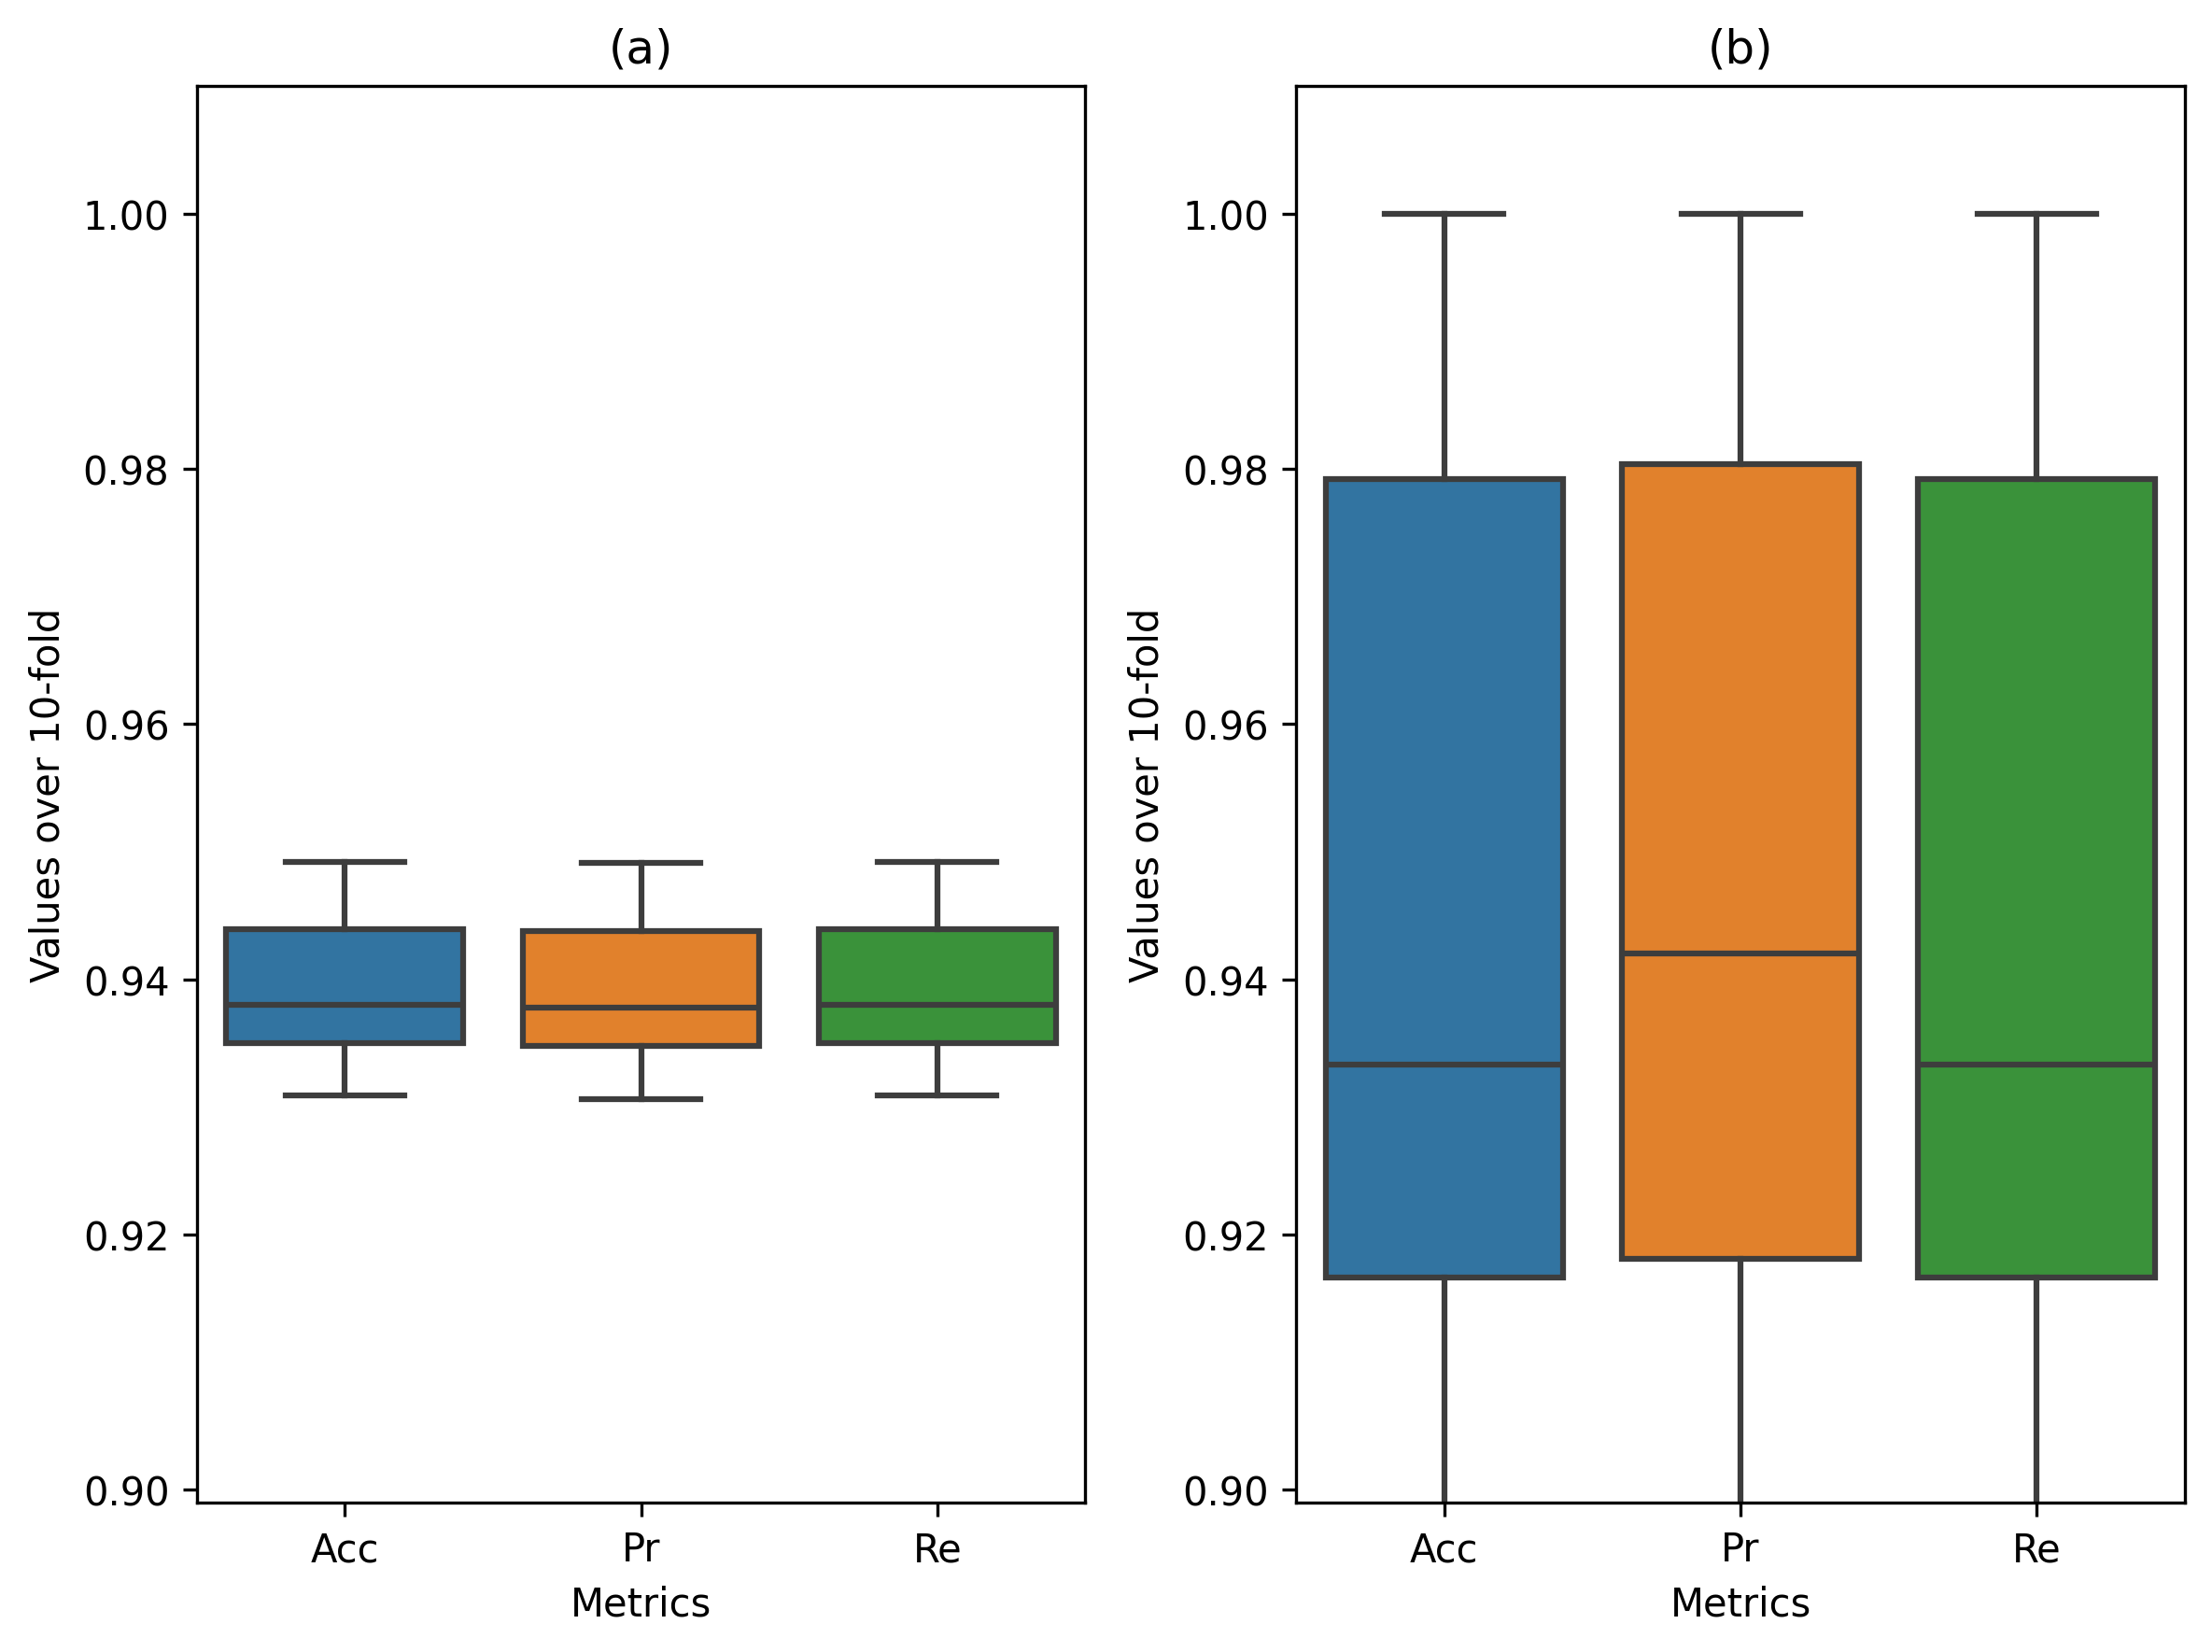

In [19]:
df_train = pd.DataFrame()
df_train['Acc'] = acc_train
df_train['Pr']  = pr_train
df_train['Re']  = re_train

df_test = pd.DataFrame()
df_test['Acc'] = acc_test
df_test['Pr']  = pr_test
df_test['Re']  = re_test

plt.figure(dpi=300, figsize=(8,6))
plt.subplot(121)
plt.title('(a)')
sns.boxplot(data=df_train)
plt.ylim((0.899, 1.01))
plt.xlabel('Metrics')
plt.ylabel('Values over 10-fold')
plt.subplot(122)
plt.title('(b)')
sns.boxplot(data=df_test)
plt.ylim((0.899, 1.01))
plt.xlabel('Metrics')
plt.ylabel('Values over 10-fold')
plt.tight_layout()
plt.show()

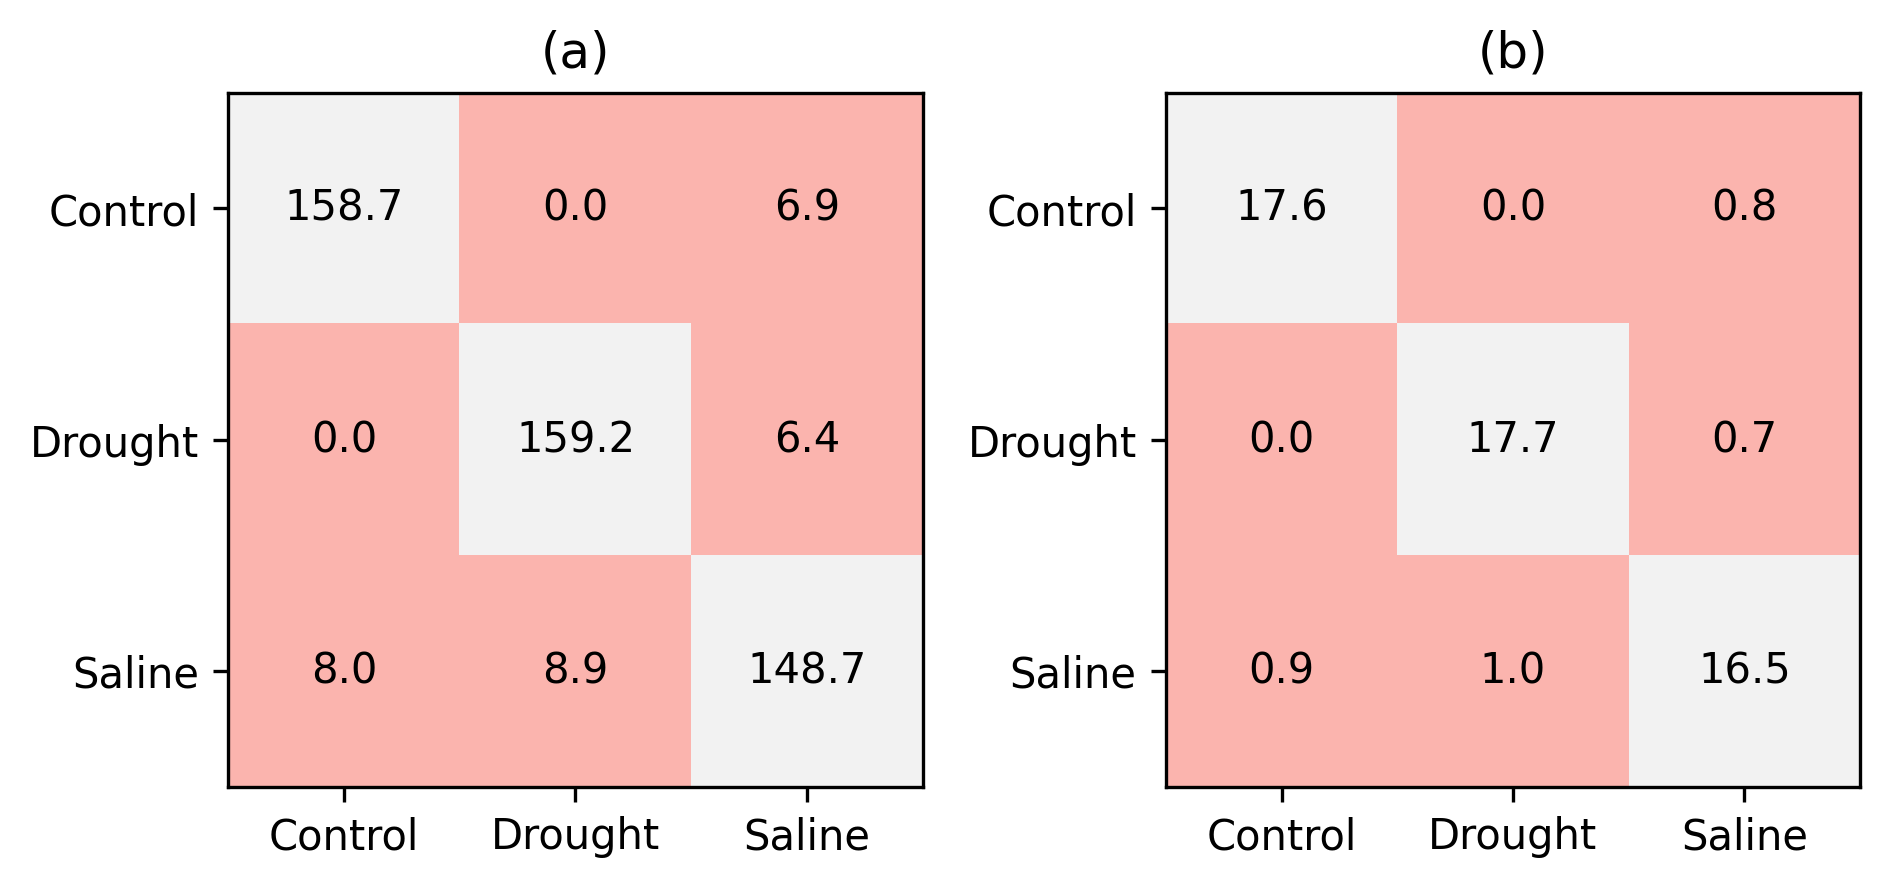

In [20]:
'''
Plot the average confusion matrix
'''
classes = ["Control", "Drought", "Saline"]

MC_train = np.mean(mc_train, axis=0)
MC_test  = np.mean(mc_test, axis=0)

fig = plt.figure(dpi=300)
plt.subplot(121)
plt.imshow(MC_train, cmap='Pastel1')
plt.title('(a)')
plt.xticks(np.arange(len(classes)), labels=classes)
plt.yticks(np.arange(len(classes)), labels=classes)

# Loop over data dimensions and create text annotations.
for k in range(len(classes)):
    for j in range(len(classes)):
        text = plt.text(j, k, MC_train[k, j], ha="center", va="center", color="k")

plt.subplot(122)
plt.imshow(MC_test, cmap='Pastel1')
plt.title('(b)')
plt.xticks(np.arange(len(classes)), labels=classes)
plt.yticks(np.arange(len(classes)), labels=classes)

# Loop over data dimensions and create text annotations.
for k in range(len(classes)):
    for j in range(len(classes)):
        text = plt.text(j, k, MC_test[k, j], ha="center", va="center", color="k")

fig.tight_layout()
plt.show()

In [21]:
'''
Checks which cultivars generate the most prediction errors
'''

Cultivars_errs_train = []
Cultivars_errs_test = []

group_kfold = GroupKFold(n_splits=10)

for train_index, test_index in group_kfold.split(X, y, Cultivar):

  X_train, X_test = X[train_index], X[test_index]
  y_train, y_test = y[train_index], y[test_index]

  train_indices.append(train_index)
  test_indices.append(test_index)

  clf = GaussianNB()
  clf.fit(X_train, y_train)

  for i, x_train in enumerate(X_train):
    y_pred_train = clf.predict(x_train.reshape(1, -1))[0]
    if y_pred_train != y_train[i]:
      Cultivars_errs_train.append([Cultivar[train_index[i]], y_train[i], y_pred_train])

  for i, x_test in enumerate(X_test):
    y_pred_test = clf.predict(x_test.reshape(1, -1))[0]
    if y_pred_test != y_test[i]:
      Cultivars_errs_test.append([Cultivar[test_index[i]], y_test[i], y_pred_test])

In [22]:
Cultivares_errs_train_ = []
last_cultivar = None
for cultivar in Cultivars_errs_train:
  if cultivar != last_cultivar:
    Cultivares_errs_train_.append(cultivar)
    last_cultivar = cultivar

Cultivares_errs_train_ = np.array(Cultivares_errs_train_)
Cultivares_errs_name_train = list(Cultivares_errs_train_[:,0])

Cultivares_errs_test_ = []
last_cultivar = None
for cultivar in Cultivars_errs_test:
  if cultivar != last_cultivar:
    Cultivares_errs_test_.append(cultivar)
    last_cultivar = cultivar

Cultivares_errs_test_ = np.array(Cultivares_errs_test_)
Cultivares_errs_name_test = list(Cultivares_errs_test_[:,0])

In [23]:
print('Cultivars with more prediction errors')

print('> Training')
for cultivar in Cultivares_errs_name_train:
  print(cultivar, ': ', Cultivares_errs_name_train.count(cultivar), ' # ', end='')

print('\n> Test')
for cultivar in Cultivares_errs_name_test:
  print(cultivar, ': ', Cultivares_errs_name_test.count(cultivar), ' # ', end='')

Cultivars with more prediction errors
> Training
5D 615 RR :  9  # CD 238 RR :  9  # NS 5909 IPRO :  9  # FPS solimoes RR :  9  # NS 5151 IPRO :  9  # NS 6909 IPRO :  9  # NS 7338 IPRO :  9  # CG 67 RR :  9  # CG 8166 RR :  9  # AS 3610 IPRO :  4  # AS 3575 IPRO :  9  # FPS Netuno RR :  9  # FPS Paranapanema RR :  9  # RK 6813 RR :  9  # DESAFIO RR :  17  # 5D 6215 IPRO :  9  # 5G 830 RR :  7  # NS 5909 IPRO :  9  # DESAFIO RR :  17  # FPS solimoes RR :  9  # NS 5151 IPRO :  9  # NS 6909 IPRO :  9  # CG 67 RR :  9  # CG 8166 RR :  9  # AS 3575 IPRO :  9  # FPS Netuno RR :  9  # FPS Paranapanema RR :  9  # M7110 IPRO  :  9  # RK 6813 RR :  9  # PONTA IPRO :  9  # DESAFIO RR :  17  # 5D 615 RR :  9  # 5D 6215 IPRO :  9  # 5G 830 RR :  7  # CD 238 RR :  9  # NS 5909 IPRO :  9  # DESAFIO RR :  17  # FPS solimoes RR :  9  # NS 5151 IPRO :  9  # NS 6909 IPRO :  9  # NS 7338 IPRO :  9  # CG 67 RR :  9  # CG 8166 RR :  9  # AS 3575 IPRO :  9  # FPS Netuno RR :  9  # FPS Paranapanema RR :  9  #

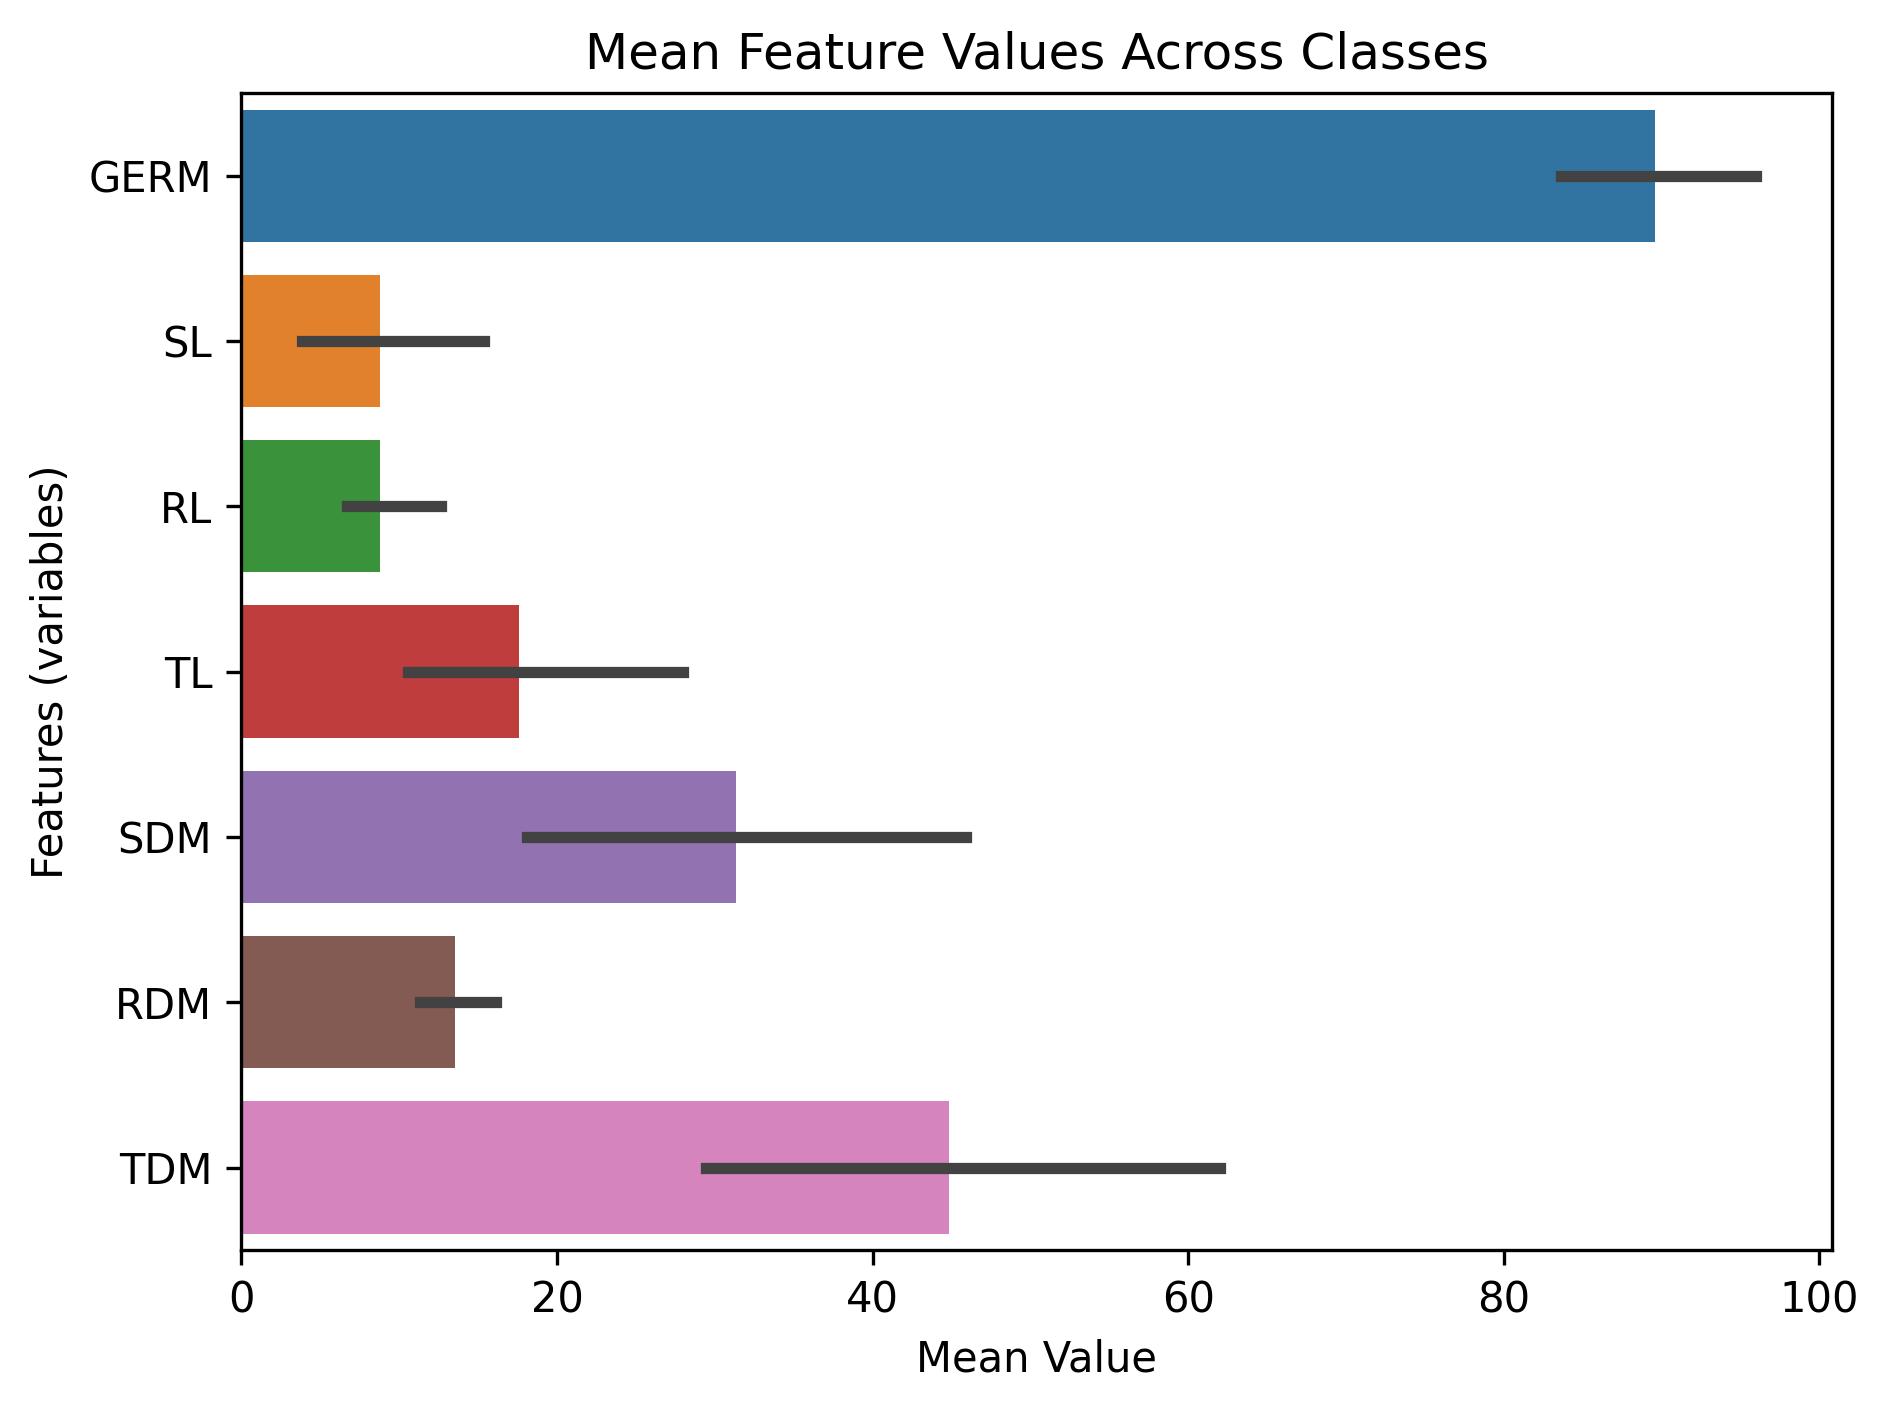

        GERM         SL         RL         TL        SDM        RDM        TDM
0  89.203629  15.353326  12.643744  27.985109  45.912088  16.117061  62.030781
1  95.976596   3.835058   6.709278  10.523683  18.107366  11.341058  29.448972
2  83.594714   7.206899   6.991734  14.189938  30.002371  13.088939  43.083158


In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.naive_bayes import GaussianNB
from sklearn.model_selection import GroupKFold

# Initialize lists to store mean feature values across folds
mean_features = []

# Initialize GroupKFold
group_kfold = GroupKFold(n_splits=10)

# Iterate over folds
for train_index, test_index in group_kfold.split(X, y, Cultivar):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    # Initialize and fit Gaussian Naive Bayes model
    clf = GaussianNB()
    clf.fit(X_train, y_train)

    # Access mean feature values for each class
    class_means = clf.theta_  # Mean values for each feature and each class
    mean_features.append(class_means)

# Convert mean_features list to numpy array
mean_features = np.array(mean_features)

# Transpose the array to have classes as rows and features as columns
mean_features = mean_features.transpose(1, 0, 2)

# Create a DataFrame to hold mean feature values
df = pd.DataFrame(mean_features.mean(axis=1), columns=['GERM', 'SL', 'RL', 'TL', 'SDM', 'RDM', 'TDM'])

# Plotting using Seaborn
plt.figure(dpi=300)
sns.barplot(data=df, orient='h')
plt.xlabel('Mean Value')
plt.ylabel('Features (variables)')
plt.title('Mean Feature Values Across Classes')
plt.tight_layout()
plt.show()

# Display the DataFrame
print(df)
